# workflows presented in "The long-term instability of glacier dynamics due to a sudden change of basal lubrication"

## (DRAFT) v 0.1

This notebook is not officially published yet. All the content is subject to change at any time. 

### Objectives besides the science

Beside the science, the other important purpose of this notebook is to test and find the best way to present a live workflow along with an academic publication (e.g., a journal paper published by Geophysical Research Letters), maximizing its reproducibility.

We plan to submit this notebook as part of the supporting information of the manuscript (xxx - see the title).

Triditionally, this kind of materials would be zipped and uploaded to the same place where you can find online paper text (probably through a DOI).

In the light of the FAIR data policy, publishers are beginning to ask that the supplemental materials should be easily findable, accessible, and reusable as well. A popular option for geoscience researchers is Zenodo, which we can get a permanent DOI for the data sets, code, and documents uploaded there. 

Here we would like to make one step forward and see how we can include Jupyter notebooks + binder or Jupyter Book pages as the supplemental materials while retaining their functionaility to the users. (i.e. they should NOT be only uploaded to Zenodo as a zipped file).

### Color codes for the challenges 

<font color='blue'> This means a minor issue -- can be resolved without much effort.</font>

<font color='red'> This means a major issue -- needs attention of more people.</font>

## 1. Results from the data of the Greenland Ice Sheet

The notebook calculates $P_e$ and $J_0$ of multiple glaciers in Greenland using the flowline location provided by Felikson et al (2021). <font color='blue'>(Needs a formal ciation and reference section)</font>

The $P_e$ and $J_0$ are then compared with the glacier speed change during 1998-2018 from the ITS_LIVE data set.

<font color='red'> Suppose we get a DOI from Zenodo's service by uploading the supplemental materials. How to make the DOI link to a binder or a Jupyter book page so users can directly execute these cells? Should we contact Zenodo team for more discussion? </font>

In [1]:
%load_ext autoreload
%autoreload 2
# %matplotlib widget

`pjgris.py` contains few functions for running this notebook. It is not meant to be published as a Python package (at least this is what I think). <font color='blue'>What is a good way to host this file?</font>

In [46]:
from pjgris import my_savgol_filter, savgol_smoothing, pe_corefun, cal_pej0_for_each_flowline, cal_avg_for_each_basin
# import glob
import rasterio
import utils
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
# from scipy import interpolate
from pathlib import Path
import pickle

This notebook needs to import lots of data from the SI of Felikson et al.'s paper. Each `.nc` file here is roughly 20-30 MB. <font color='red'>What is a good way to host these data?</font>

In [3]:
netcdf_dir = '/home/jovyan/Projects/LubriSens/Data/Felikson2021/netcdfs'
glacier_labels = ['0001', '0003', '0004', '0005', '0007', '0009', '0010', '0014', '0015', '0016', 
                  '0019', '0020', '0021', '0022', '0024', '0025', '0027', '0029', '0035', '0036',
                  '0037', '0039', '0043', '0046', '0047', '0048', '0049', '0050', '0052', '0054', 
                  '0058', '0059', '0085', '0099', '0103', '0105', '0106', '0111', '0113', '0114',
                  '0115', '0116', '0124', '0129', '0135', '0152', '0167', '0168', '0174', '0177',
                  '0181', '0183', '0207', '0208', '0212', '0213', '0217', '0245', '0252', '0276',
                  '0277', 'a006', 'a011', 'a030', 'a031', 'a033', 'a034', 'a045', 'a061', 'a112', 
                  'a132', 'a147', 'a148', 'a173', 'a184', 'a199', 'a251', 'a260', 'b006', 'b011',
                  'b030', 'b031', 'b033', 'b034', 'b045', 'b061', 'b132', 'b147', 'b148', 'b173',
                  'b184', 'b199', 'b216', 'b251', 'c031', 'c033', 'c034', 'c061', 'c173', 'c184', 
                  'c216', 'd173', 'd184', 'd216']

# glaciers = [i for i in glob.glob(netcdf_dir + '/glacier*.nc')]
glaciers = [netcdf_dir + '/glacier' + i + '.nc' for i in glacier_labels]
# glaciers.sort()
print('glaciers total: {}'.format(len(glaciers)))
# glaciers

glaciers total: 104


This notebook also uses ITS_LIVE dataset as the input of glacier speed. <font color='blue'>Should we show how to get the data from the ITS_LIVE website, or just give readers the downloaded file?</font>

In [4]:
speed_file = '/home/jovyan/Projects/LubriSens/Data/ITSLIVE/GRE_G0240_1998_v.tif'
speed_data = rasterio.open(speed_file)
vdiff_file = '/home/jovyan/Projects/LubriSens/Data/ITSLIVE/GRE_G0240_diff-2018-1998_v.tif'
vdiff_data = rasterio.open(vdiff_file)

In [8]:
# for glacier_file in glaciers:
#     print(Path(glacier_file).stem[-4:])

In [10]:
mega_results = {}

for glacier_file in glaciers:
    ds = Dataset(glacier_file, 'r')
    flowline_groups, _ = utils.get_flowline_groups(ds)
    primary_flowlines = [i for i in flowline_groups if 'iter' not in i.path]
    
    results = {}

    for flowline_group in primary_flowlines:

        data_group = cal_pej0_for_each_flowline(flowline_group, speed_data, vdiff_data)

        if data_group is not None:
            results[flowline_group.name] = data_group

    results['avg'] = cal_avg_for_each_basin(results)
    mega_results[Path(glacier_file).stem[-4:]] = results
    
pickle.dump(mega_results, open( "mega_results.p", "wb" ))

Here comes a long cell because most lines here are within a for loop. <font color='red'> Is it possible to run a for loop across multiple cells so we can make better comments/explanations using Markdown for the code within  the loop? </font>

In [12]:
mega_results = pickle.load( open( "mega_results.p", "rb" ) )

In [9]:
# for key in mega_results:
#     print(key)
# mega_results['0001']

The following cells visualize the results. <font color='blue'>I don't know if making either (or all) of them interactive is a good idea or not.... Maybe we will see some time while working on the other issues.</font>

In [11]:
# burd = cm.get_cmap('turbo', 51)
# print(burd(1))

In [14]:
1+1

2

In [15]:
for key in mega_results['0021']['avg']:
    print(key)

d
s
b
u
pe
j0
term1
term2
term3
term4
term5
term6
udiff
udiff_sm
pe_ignore_dslope
j0_ignore_dslope


In [16]:
d = mega_results['0021']['avg']['d']
pe = mega_results['0021']['avg']['pe_ignore_dslope']
j0 = mega_results['0021']['avg']['j0_ignore_dslope']

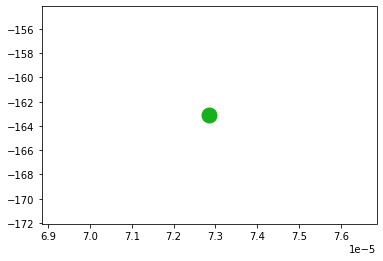

In [34]:
plt.plot(next(x for x in pe if not np.isnan(x)), next(x for x in j0 if not np.isnan(x)), '.', color='xkcd:green', markersize=30)

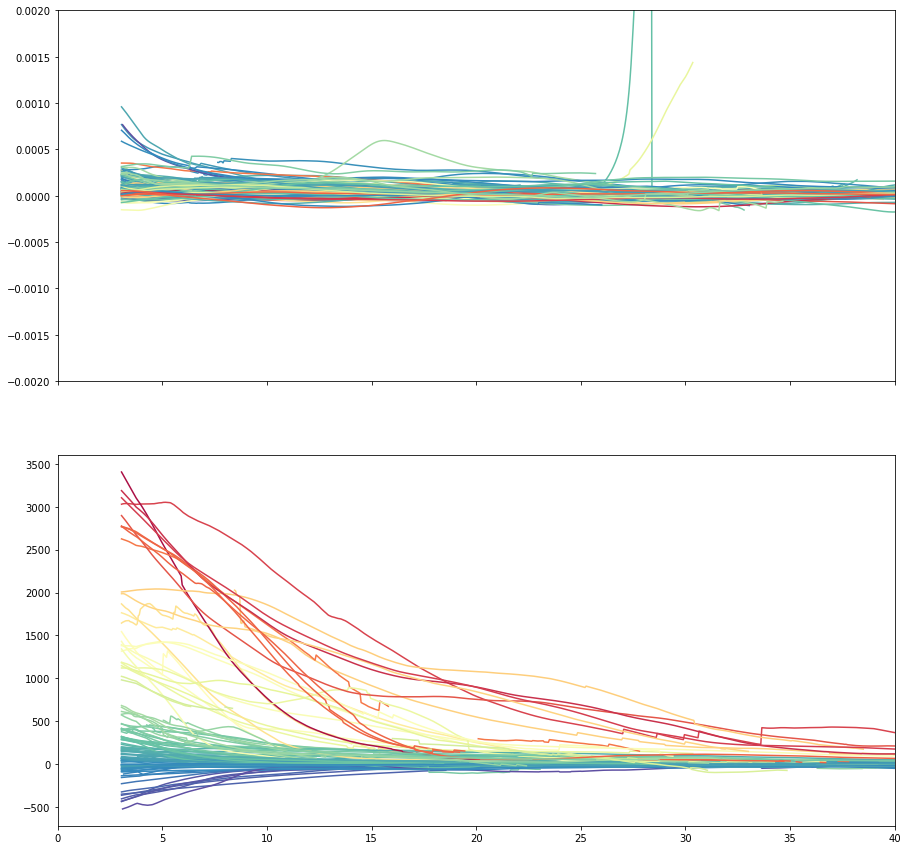

In [59]:
# results

fig, ax1 = plt.subplots(2, 1, sharex=True, figsize=(15, 15))
cmap = cm.get_cmap('Spectral_r')
for key in mega_results:
    z_max = np.nanmax(mega_results[key]['avg']['udiff_sm'])
    z_min = np.nanmin(mega_results[key]['avg']['udiff_sm'])
    z_value = z_max if abs(z_max) > abs(z_min) else z_min
    z_value_scaled = (z_value + 500) / 4000
    rgba = cmap(z_value_scaled)
    # if z_value > 1000:
    #     linecolor = 'xkcd:red'
    # elif z_value < -250: 
    #     linecolor = 'xkcd:blue'
    # else:
    #     linecolor = 'xkcd:green'
    # linecolor = (z_value + 500) / 3500
    # linecolor = 1 if linecolor > 1 else linecolor 
    # linecolor = 0 if linecolor < 0 else linecolor 
    # print(key, linecolor)
    ax1[0].plot(mega_results[key]['avg']['d'], mega_results[key]['avg']['pe_ignore_dslope'], color=rgba)    # color=burd(linecolor)
    ax1[0].set_ylim([-0.002, 0.002])
    ax1[1].plot(mega_results[key]['avg']['d'], mega_results[key]['avg']['udiff_sm'], color=rgba)
    ax1[1].set_xlim([0, 40])


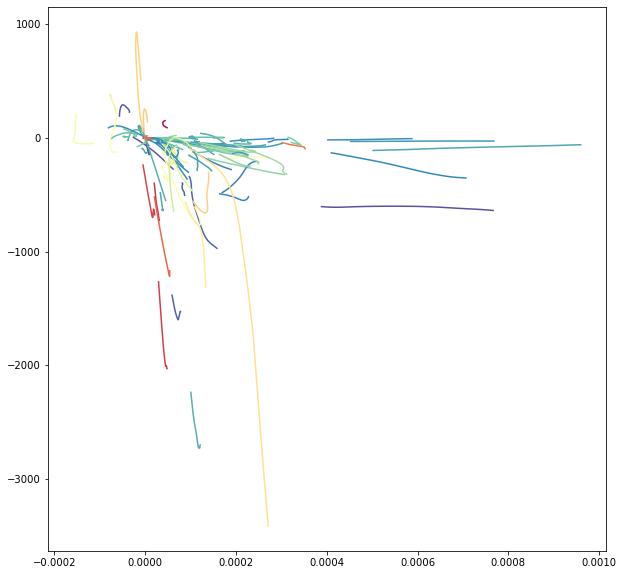

In [57]:
fig, ax2 = plt.subplots(1, 1, sharex=True, figsize=(10, 10))
cmap = cm.get_cmap('Spectral_r')
for key in mega_results:
    z_max = np.nanmax(mega_results[key]['avg']['udiff_sm'])
    z_min = np.nanmin(mega_results[key]['avg']['udiff_sm'])
    z_value = z_max if abs(z_max) > abs(z_min) else z_min
    z_value_scaled = (z_value + 500) / 4000
    rgba = cmap(z_value_scaled)
    # if z_value > 200:
    #     linecolor = 'xkcd:red'
    # elif z_value < -250: 
    #     linecolor = 'xkcd:blue'
    # else:
    #     linecolor = 'xkcd:green'
    # linecolor = (z_value + 500) / 3500
    # linecolor = 1 if linecolor > 1 else linecolor 
    # linecolor = 0 if linecolor < 0 else linecolor 
    # ax2.plot(mega_results[key]['avg']['pe'][:100], mega_results[key]['avg']['j0'][:100], color=linecolor)
    ax2.plot(mega_results[key]['avg']['pe_ignore_dslope'][:100], mega_results[key]['avg']['j0_ignore_dslope'][:100], color=rgba)

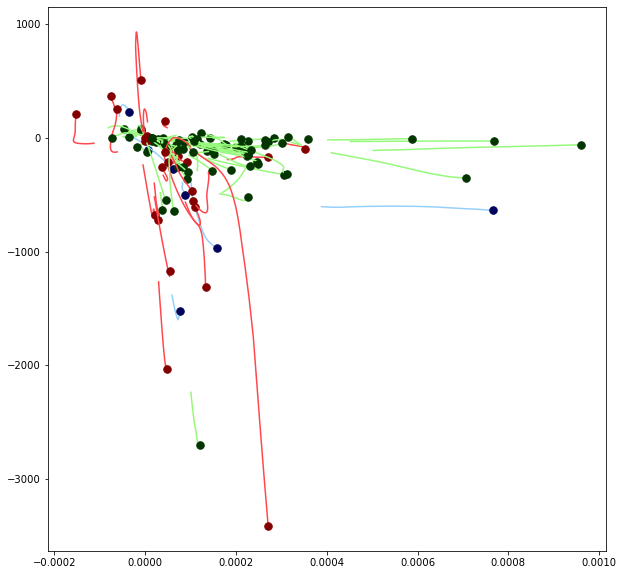

In [43]:
length = 200
fig, ax3 = plt.subplots(1, 1, sharex=True, figsize=(10, 10))
for key in mega_results:
    z_max = np.nanmax(mega_results[key]['avg']['udiff_sm'])
    z_min = np.nanmin(mega_results[key]['avg']['udiff_sm'])
    z_value = z_max if abs(z_max) > abs(z_min) else z_min
    if z_value > 1000:
        linecolor1 = 'xkcd:light red'
        linecolor2 = 'xkcd:dark red'
    elif z_value < -250: 
        linecolor1 = 'xkcd:light blue'
        linecolor2 = 'xkcd:dark blue'
    else:
        linecolor1 = 'xkcd:light green'
        linecolor2 = 'xkcd:dark green'
    # linecolor = (z_value + 500) / 3500
    # linecolor = 1 if linecolor > 1 else linecolor 
    # linecolor = 0 if linecolor < 0 else linecolor 
    # ax2.plot(mega_results[key]['avg']['pe'][:100], mega_results[key]['avg']['j0'][:100], color=linecolor)
    ax3.plot(mega_results[key]['avg']['pe_ignore_dslope'][:100], mega_results[key]['avg']['j0_ignore_dslope'][:100], color=linecolor1)
    ax3.plot(next(x for x in mega_results[key]['avg']['pe_ignore_dslope'] if not np.isnan(x)),
             next(x for x in mega_results[key]['avg']['j0_ignore_dslope'] if not np.isnan(x)), '.', color=linecolor2, markersize=15)

In [21]:
next(x for x in mega_results['0001']['avg']['pe_ignore_dslope'][:length] if not np.isnan(x))

2.1362515307452037e-05

In [ ]:
mega_results['0001']['avg']['pe_ignore_dslope'][:length]

In [10]:
# for i, j in zip(results['glacier0021.nc']['d'], results['glacier0021.nc']['pe']):
#     print(i, j)

In [11]:
fig, ax3 = plt.subplots(1, 1, sharex=True)
for key in results:
    z_max = np.nanmax(results[key]['udiff_sm'])
    z_min = np.nanmin(results[key]['udiff_sm'])
    z_value = z_max if abs(z_max) > abs(z_min) else z_min
    if z_value > 1000:
        linecolor = 'xkcd:red'
    elif z_value < -250: 
        linecolor = 'xkcd:brown'
    else:
        linecolor = 'xkcd:blue'
    # linecolor = (z_value + 500) / 3500
    # linecolor = 1 if linecolor > 1 else linecolor 
    # linecolor = 0 if linecolor < 0 else linecolor 
    # ax3.plot(results[key]['term1'][:150] + results[key]['term2'][:150] + results[key]['term3'][:150] + results[key]['term4'][:150], results[key]['j0'][:150], color=linecolor)
    ax3.plot(results[key]['term1'][:100] + results[key]['term2'][:100] + results[key]['term3'][:100], results[key]['j0'][:100], color=linecolor)

    
ax3.set_xlabel(r'$\frac{P_e}{\ell}$ (1/m)')
ax3.set_ylabel(r'$J_0$ (m/yr)')
ax3.set_title('Greenland Ice Sheet \n Accelerated glaciers = red; Stable glaciers = blue; Decce. gl. = brown')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Text(0.5, 1.0, 'Greenland Ice Sheet \n Accelerated glaciers = red; Stable glaciers = blue; Decce. gl. = brown')

In [12]:
# fig, ax4 = plt.subplots(1, 1, sharex=True)
# for key in results:
#     z_max = np.nanmax(results[key]['udiff_sm'])
#     z_min = np.nanmin(results[key]['udiff_sm'])
#     z_value = z_max if abs(z_max) > abs(z_min) else z_min
#     if z_value > 500:
#         linecolor = 'xkcd:red'
#     elif z_value < -250: 
#         linecolor = 'xkcd:brown'
#     else:
#         linecolor = 'xkcd:blue'
#     # linecolor = (z_value + 500) / 3500
#     # linecolor = 1 if linecolor > 1 else linecolor 
#     # linecolor = 0 if linecolor < 0 else linecolor 
#     # ax3.plot(results[key]['term1'][:150] + results[key]['term2'][:150] + results[key]['term3'][:150] + results[key]['term4'][:150], results[key]['j0'][:150], color=burd(linecolor))
#     ax4.plot(results[key]['term1'][:100] + results[key]['term2'][:100] + results[key]['term3'][:100], results[key]['j0'][:100], color=linecolor)

    
# ax4.set_xlabel(r'$\frac{P_e}{\ell}$ (1/m)')
# ax4.set_ylabel(r'$J_0$ (m/yr)')
# ax4.set_title('Greenland Ice Sheet \n Accelerated glaciers = red; Stable glaciers = blue; Decce. gl. = brown')

In [13]:
from pathlib import Path
Path(glacier_file).stem

'glacierd216'

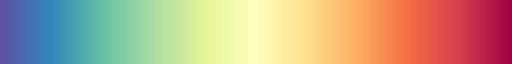

In [55]:
cmap = cm.get_cmap('Spectral_r')
cmap

In [54]:
rgba = cmap(1.7)
print(rgba) # (0.99807766255210428, 0.99923106502084169, 0.74602077638401709, 1.0)

(0.3686274509803922, 0.30980392156862746, 0.6352941176470588, 1.0)
